## 1. <a>Import Libraries</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest


from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

## 2. <a>Read Data</a>


In [2]:
df_transformed = pd.read_csv('../Data/Data_Power.csv')
df_transformed

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -1.238103          -1.079348  -0.368050         -1.000488   
1     1.051961          -0.424939  -1.505149         -1.000488   
2     0.860616           0.628612   0.521657          1.065381   
3     0.570542          -1.710851   0.875823          1.229556   
4     0.111925           0.628612  -0.904786         -0.019902   
...        ...                ...        ...               ...   
8945 -1.351366           0.628612   0.066579         -1.000488   
8946 -1.465213           0.628612   0.079480         -1.000488   
8947 -1.409349          -0.991324  -0.216300         -1.000488   
8948 -1.558537          -0.991324  -1.505149         -1.000488   
8949 -0.324310          -1.646311   0.702026          1.152077   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.383704     -0.944538            -0.766859   
1                  -1.085422      1.399909            -1.278866   
2                  -1.085422     -0.944538             1.218860   
3                  -1.085422      0.680451            -1.015926   
4                  -1.085422     -0.944538            -1.015926   
...                      ...           ...                  ...   
8945                0.748736     -0.944538             1.218860   
8946                0.758643     -0.944538             1.218860   
8947                0.518629     -0.944538             0.876464   
8948               -1.085422      0.237936            -1.278866   
8949               -1.085422      0.562485             0.511403   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.903315                         -0.606642   
1                      -0.903315                         -1.004445   
2                       1.732554                         -1.004445   
3                      -0.092230                         -1.004445   
4                      -0.092230                         -1.004445   
...                          ...                               ...   
8945                   -0.903315                          1.183098   
8946                   -0.903315                          1.183098   
8947                   -0.903315                          0.943466   
8948                   -0.903315                         -1.004445   
8949                    1.566055                         -1.004445   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.883204         -0.905801      -0.573664     -1.425353   
1                   1.124423          1.044342      -1.387624      0.924217   
2                  -0.883204         -0.905801       0.494757      1.012194   
3                   0.136071          0.194580      -0.872718      1.012194   
4                  -0.883204         -0.905801      -0.872718     -1.215705   
...                      ...               ...            ...           ...   
8945               -0.883204         -0.905801       0.046192     -1.425353   
8946               -0.883204         -0.905801       0.046192     -1.425353   
8947               -0.883204         -0.905801      -0.066072     -1.425353   
8948                0.745869          0.635829      -1.387624     -2.203309   
8949                1.367068          0.635829       0.935473     -1.215705   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.983876         -0.824388         -0.677889  0.422252  
1     1.285321          0.917393          1.235021  0.422252  
2    -0.291722          0.475906         -0.677889  0.422252  
3    -2.782085         -0.115812         -0.677889  0.422252  
4    -0.231669         -0.327305         -0.677889  0.422252  
...        ...               ...               ...       ...  
8945 -0.708925         -1.782947          1.731651 -2.526612  
8946 -0.807239         -0.115812         -0.677889 -2.526612  
8947 -1.437791         -1.300748          1.328455 -

In [3]:
df_transformed.describe().T

count          mean       std       min  \
BALANCE                           8950.0  1.077847e-16  1.000056 -2.120305   
BALANCE_FREQUENCY                 8950.0 -9.926833e-15  1.000056 -1.997716   
PURCHASES                         8950.0  1.163985e-15  1.000056 -1.505149   
ONEOFF_PURCHASES                  8950.0 -1.997335e-15  1.000056 -1.000488   
INSTALLMENTS_PURCHASES            8950.0 -2.597054e-16  1.000056 -1.085422   
CASH_ADVANCE                      8950.0 -2.114783e-15  1.000056 -0.944538   
PURCHASES_FREQUENCY               8950.0  4.847643e-16  1.000056 -1.278866   
ONEOFF_PURCHASES_FREQUENCY        8950.0 -5.023914e-16  1.000056 -0.903315   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  1.697612e-15  1.000056 -1.004445   
CASH_ADVANCE_FREQUENCY            8950.0 -7.430431e-17  1.000056 -0.883204   
CASH_ADVANCE_TRX                  8950.0 -7.843260e-16  1.000056 -0.905801   
PURCHASES_TRX                     8950.0  1.279386e-15  1.000056 -1.387624   
CREDIT_LIMIT                      8950.0  1.512285e-15  1.000056 -4.573150   
PAYMENTS                          8950.0 -2.820835e-17  1.000056 -2.782085   
MINIMUM_PAYMENTS                  8950.0 -7.477321e-16  1.000056 -5.869902   
PRC_FULL_PAYMENT                  8950.0 -2.734796e-15  1.000056 -0.677889   
TENURE                            8950.0  1.697870e-14  1.000056 -2.526612   

                                       25%       50%       75%       max  
BALANCE                          -0.816807  0.151681  0.717913  2.731227  
BALANCE_FREQUENCY                -0.598992  0.628612  0.628612  0.628612  
PURCHASES                        -0.654799  0.160770  0.710251  3.559070  
ONEOFF_PURCHASES                 -1.000488  0.237516  0.990945  1.959134  
INSTALLMENTS_PURCHASES           -1.085422  0.361196  0.906100  2.212015  
CASH_ADVANCE                     -0.944538 -0.944538  1.059052  1.729923  
PURCHASES_FREQUENCY              -1.015926  0.119657  1.050283  1.218860  
ONEOFF_PURCHASES_FREQUENCY       -0.903315 -0.092230  0.978077  1.732554  
PURCHASES_INSTALLMENTS_FREQUENCY -1.004445 -0.273845  1.069884  1.377136  
CASH_ADVANCE_FREQUENCY           -0.883204 -0.883204  1.016910  1.902718  
CASH_ADVANCE_TRX                 -0.905801 -0.905801  1.044342  1.921254  
PURCHASES_TRX                    -0.872718  0.143257  0.729118  2.838620  
CREDIT_LIMIT                     -0.880590 -0.129660  0.830085  2.851804  
PAYMENTS                         -0.608905 -0.064284  0.569453  4.568553  
MINIMUM_PAYMENTS                 -0.643745 -0.115812  0.665890  4.036562  
PRC_FULL_PAYMENT                 -0.677889 -0.677889  0.854117  1.873638  
TENURE                            0.422252  0.422252  0.422252  0.422252

## 3. <a>TSNE Visualize Data</a>


In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, 
            perplexity=80,  
            random_state=42,
            n_iter=300).fit_transform(df_transformed)

In [5]:
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed



feature1  feature2
0    -6.384003  1.632845
1     1.420747 -7.747530
2     1.907000  3.119007
3    -2.787981 -3.172010
4    -0.976071  2.020831
...        ...       ...
8945 -8.943099 -3.364820
8946 -7.569374 -2.003680
8947 -9.235943 -2.342792
8948  3.978807 -6.957536
8949  6.765435 -5.623805

[8950 rows x 2 columns]

[Text(0.5, 1.0, 'All Data')]

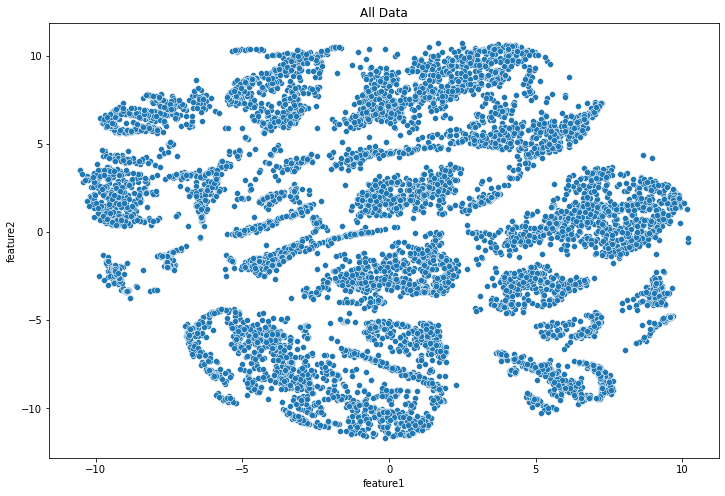

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    palette=sns.color_palette("hls", 2)
).set(title='All Data')

# Clustreing


## 1. <a>K-Means</a>


#### First, Select number of clusters (k) using Elbow Method 

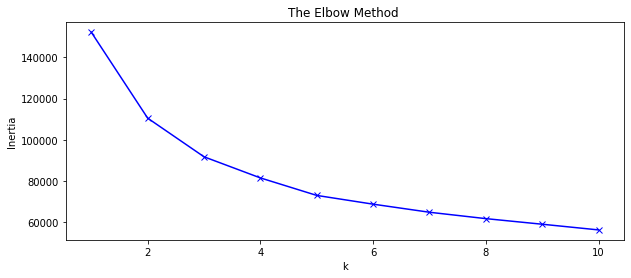

In [7]:
# To plot Elbow With Inertia 
inertia = []
Range = [*range(1,11)]

for k in Range: 
    kmean = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    inertia.append(kmean.inertia_)
    
plt.figure(figsize=(10,4))
plt.plot(Range, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method ')
plt.show()

In [8]:
# To calc. the best number of k from elbow method curve
drop_variation = []
drop_variation.append(0) #add 0 in the first element 

for i in range(len(inertia) -1):
    dropValue = inertia[i] - inertia[i+1]
    drop_variation.append(dropValue) 

# select suitable k that have large drop in the variation
k = Range[np.argmax(drop_variation)]
print("Suitable number of clusters = ",k)

Suitable number of clusters =  2


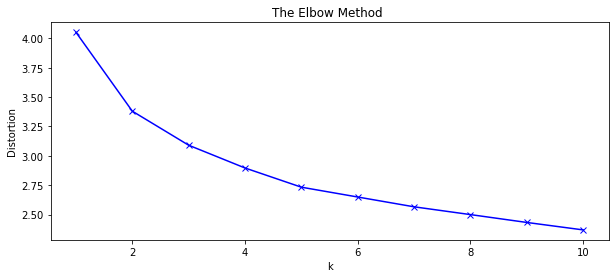

In [9]:
# To plot Elbow With Distortion 
from scipy.spatial.distance import cdist
distortions = []
Range = [*range(1,11)]

for n in Range:
    kmean = KMeans(n_clusters=n, max_iter=300, random_state=42)
    kmean.fit(df_transformed)
    distortions.append(np.average(np.min(cdist(df_transformed, kmean.cluster_centers_, 'euclidean'), axis=1)))
    
plt.figure(figsize=(10,4))
plt.plot(Range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ')
plt.show()

###  KMean in Sklearn

In [10]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_transformed)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2575
sum of elements that contain in cluster 1 : 1620
sum of elements that contain in cluster 2 : 2705
sum of elements that contain in cluster 3 : 2050
--------------------------------------------------


In [11]:
# Calc. silhouette score for kmean sklearn
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.230


In [12]:
# Calc. silhoutte score for different k
for i in [*range(2,7)]:
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df_transformed)
    label = kmeans.labels_
    print("For n_clusters =",i,"The average silhouette_score is :",silhouette_score(df_transformed,  label, metric='euclidean'))

For n_clusters = 2 The average silhouette_score is : 0.2619205996034231
For n_clusters = 3 The average silhouette_score is : 0.23718500455969174
For n_clusters = 4 The average silhouette_score is : 0.23042106462562947
For n_clusters = 5 The average silhouette_score is : 0.24249288974637528
For n_clusters = 6 The average silhouette_score is : 0.21874064676106528


We notice that silhoutte Score will be better for 2 Clusters (k = 2)

In [13]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.622


The main motive is to decrease the DB index. 

In [14]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 2582.030


##### TSNE

In [15]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -6.384003  1.632845         2
1     1.420747 -7.747530         0
2     1.907000  3.119007         3
3    -2.787981 -3.172010         0
4    -0.976071  2.020831         2
...        ...       ...       ...
8945 -8.943099 -3.364820         2
8946 -7.569374 -2.003680         2
8947 -9.235943 -2.342792         2
8948  3.978807 -6.957536         0
8949  6.765435 -5.623805         1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

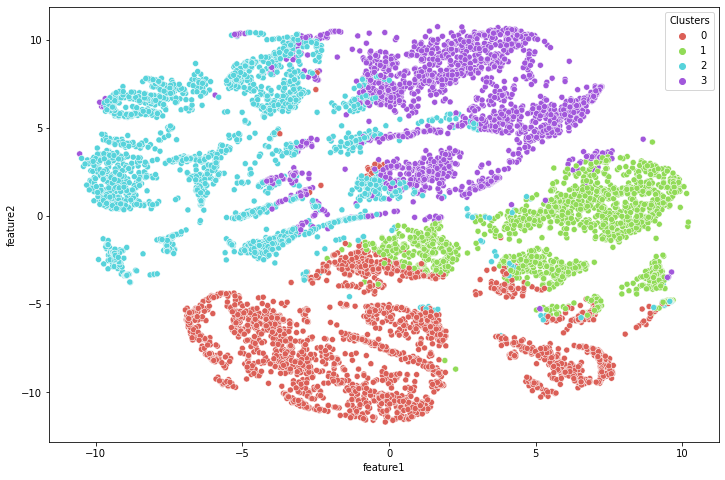

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## 2. <a>DBSCAN</a>


#### Calculate Knn-Matrix 

In [17]:
from sklearn.neighbors import NearestNeighbors
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
min_s = 10
knn = NearestNeighbors(n_neighbors=min_s+1)
knn.fit(df_transformed)
distances, neighbors = knn.kneighbors(df_transformed)

# distances ---> distance of each point to k nearest neighbours for it
# neighbors ---> index of k nearest neighbors to each poi nt

In [18]:
neighbors  # nearest neighbours for each point in data

array([[   0, 8020, 7790, ..., 4878, 6668, 4174],
       [   1, 3804, 6106, ..., 3560, 5999, 8119],
       [   2,  267, 1443, ...,   96, 4577, 2758],
       ...,
       [8947, 5571, 5556, ..., 4551, 8934, 7547],
       [8948, 8884, 6892, ..., 7906, 7327, 8842],
       [8949,  549, 8876, ..., 8280, 6082, 8744]], dtype=int64)

In [19]:
# sort the distances, take last column only and sort them 
distances = np.sort(distances[:, -1], axis = 0) 

##### Elbow Method

Text(0.5, 1.0, 'Elbow Method for Choosing eps')

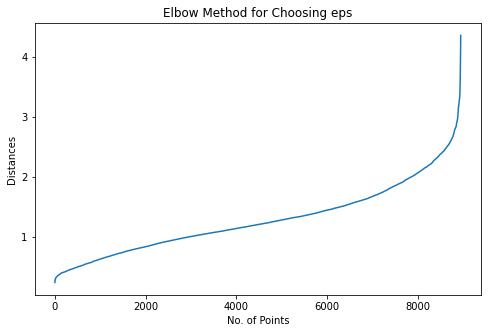

In [20]:
# plot elbow curve to choose first suitable epsilon from it
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("No. of Points")
plt.ylabel("Distances")
plt.title("Elbow Method for Choosing eps")

#### From Elbow curve we can choose epsilon that give us less noise and good clustering

In [21]:
clustering_DB_1 = DBSCAN(eps=2.2, min_samples=12).fit(df_transformed)
label_DBScan_1 = clustering_DB_1.labels_

In [22]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    7477
 1    1245
-1     201
 2      14
 3      13
dtype: int64

##### TSNE

In [23]:
df_embed_dbscan = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_dbscan['Clusters']= pd.DataFrame(label_DBScan_1)
df_embed_dbscan

feature1  feature2  Clusters
0    -6.384003  1.632845         0
1     1.420747 -7.747530         0
2     1.907000  3.119007         0
3    -2.787981 -3.172010        -1
4    -0.976071  2.020831         0
...        ...       ...       ...
8945 -8.943099 -3.364820         1
8946 -7.569374 -2.003680         1
8947 -9.235943 -2.342792         1
8948  3.978807 -6.957536         1
8949  6.765435 -5.623805         1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

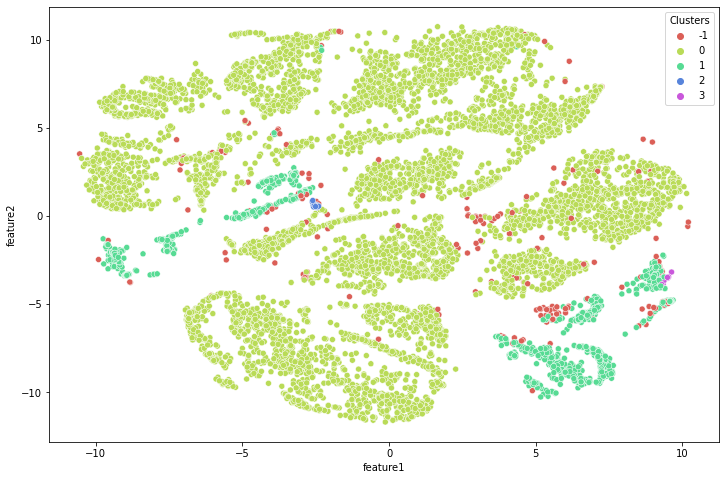

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_dbscan,    
    hue=df_embed_dbscan['Clusters'],
    palette=sns.color_palette("hls", 5)
)


## 3. <a>hierarchical</a>


##### Dendrogram

Text(20, 133, 'Cut off')

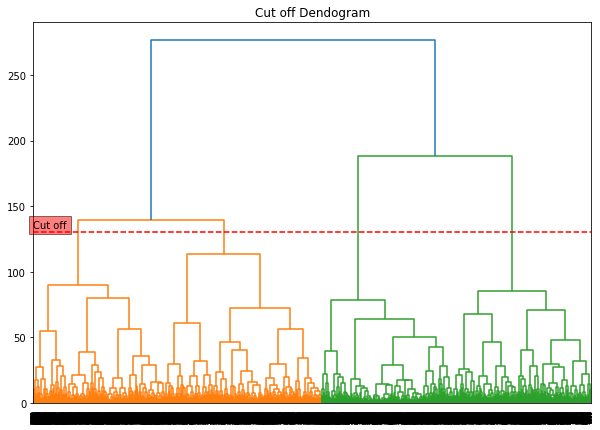

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Cut off Dendogram")
dend = shc.dendrogram(shc.linkage(y=df_transformed , method='ward',metric='euclidean'))
plt.axhline(y=130, color='r', linestyle='--')
plt.text(20, 133, "Cut off", bbox=dict(facecolor='red', alpha=0.5))

* From Dendrogram will take 4 clusters

In [26]:
from sklearn.cluster import AgglomerativeClustering

clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_transformed)
hier_labels = clustering_Agg.labels_
hier_labels


array([1, 2, 0, ..., 1, 2, 3], dtype=int64)

#### Silhouette score for Hiererichal 

In [27]:
# Calc. silhouette score for hiereichal cluster
from sklearn.metrics import silhouette_score

score = silhouette_score(df_transformed,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.202


In [28]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(df_transformed, hier_labels)
print('Davies bouldin score: %.3f' % score)

Davies bouldin score: 1.843


The main motive is to decrease the DB index. 

In [29]:
from sklearn.metrics import calinski_harabasz_score
score = calinski_harabasz_score(df_transformed, hier_labels)
print('Calinski harabasz score: %.3f' % score)

Calinski harabasz score: 2257.211


##### TSNE

In [30]:
df_embed_hier = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_hier['Clusters']= pd.DataFrame(hier_labels)
df_embed_hier

feature1  feature2  Clusters
0    -6.384003  1.632845         1
1     1.420747 -7.747530         2
2     1.907000  3.119007         0
3    -2.787981 -3.172010         2
4    -0.976071  2.020831         0
...        ...       ...       ...
8945 -8.943099 -3.364820         1
8946 -7.569374 -2.003680         1
8947 -9.235943 -2.342792         1
8948  3.978807 -6.957536         2
8949  6.765435 -5.623805         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

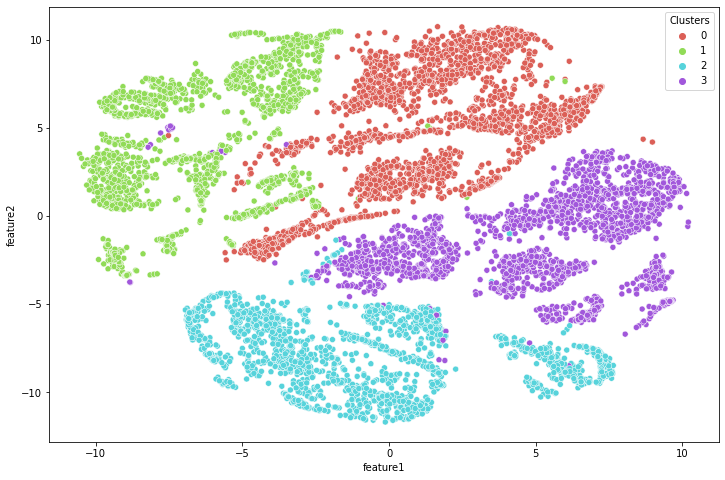

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_hier,    
    hue=df_embed_hier['Clusters'],
    palette=sns.color_palette("hls", 4)
)


# Anomaly Detection

## 1. <a>Isolated Random Forest</a>


In [32]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_transformed)

anom_pred = clf.predict(df_transformed)
anom_pred

array([ 1,  1,  1, ...,  1, -1, -1])

In [33]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [34]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1  feature2  Labels
0    -6.384003  1.632845       1
1     1.420747 -7.747530       1
2     1.907000  3.119007       1
3    -2.787981 -3.172010       1
4    -0.976071  2.020831       1
...        ...       ...     ...
8945 -8.943099 -3.364820       1
8946 -7.569374 -2.003680       1
8947 -9.235943 -2.342792       1
8948  3.978807 -6.957536      -1
8949  6.765435 -5.623805      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

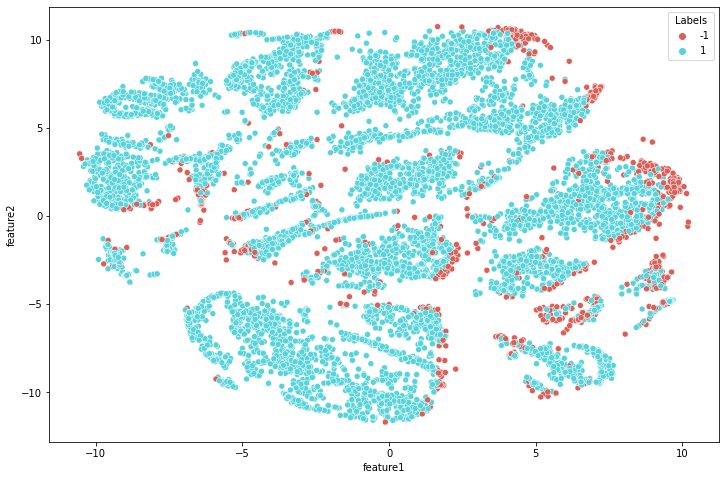

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM</a>


In [36]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_transformed)

In [37]:
scores = gm.score_samples(df_transformed)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [38]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1  feature2  Labels
0    -6.384003  1.632845       1
1     1.420747 -7.747530       1
2     1.907000  3.119007       1
3    -2.787981 -3.172010      -1
4    -0.976071  2.020831       1
...        ...       ...     ...
8945 -8.943099 -3.364820       1
8946 -7.569374 -2.003680       1
8947 -9.235943 -2.342792       1
8948  3.978807 -6.957536       1
8949  6.765435 -5.623805      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

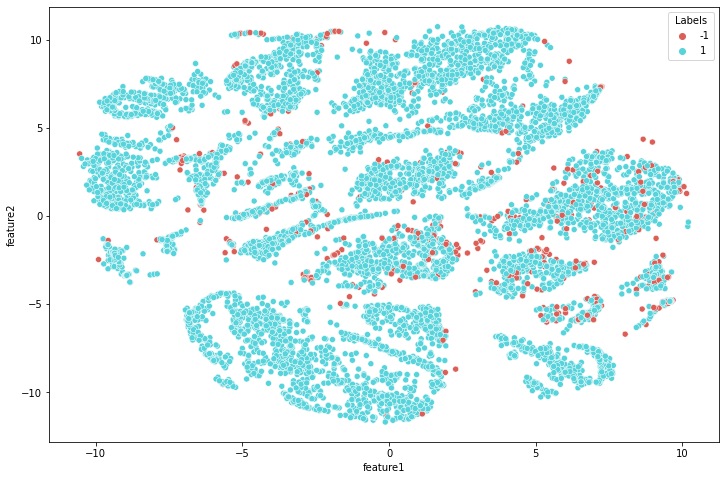

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [105]:
DB = DBSCAN(eps=2.2, min_samples=17).fit(df_transformed)
label_DBScan = DB.labels_

In [106]:
pd.DataFrame(label_DBScan).value_counts()

 0    7450
 1    1209
-1     291
dtype: int64

##### TSNE

In [107]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1  feature2  Labels
0    -6.384003  1.632845       0
1     1.420747 -7.747530       0
2     1.907000  3.119007       0
3    -2.787981 -3.172010      -1
4    -0.976071  2.020831       0
...        ...       ...     ...
8945 -8.943099 -3.364820       1
8946 -7.569374 -2.003680       1
8947 -9.235943 -2.342792       1
8948  3.978807 -6.957536       1
8949  6.765435 -5.623805       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

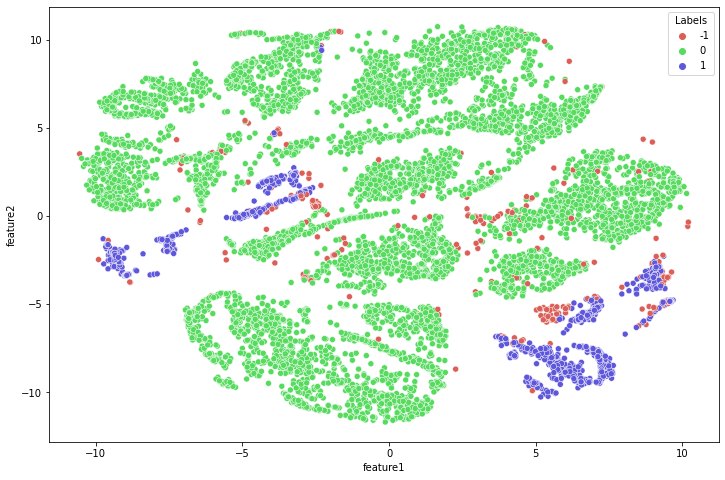

In [108]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 3)
)


# Dimensionality Reduction


## 1.<a> PCA </a>
#### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pca=pd.DataFrame(pca.fit_transform(df_transformed))
df_pca.shape

(8950, 9)

In [110]:
df_pca

0         1         2         3         4         5         6  \
0    -0.257576 -3.116032 -0.212955 -1.040357  0.059010  0.155374 -0.678293   
1    -3.479101  0.878000 -0.181643  1.331020  2.108089 -0.293439  0.679778   
2     1.338181  1.187460  2.191440 -1.741591  0.007592 -0.361631  0.290114   
3    -1.374088 -0.532106  2.053657 -0.578301 -0.583869 -0.745944 -2.209303   
4    -1.009729 -1.404850  1.018835 -1.983554  0.285817  0.602051  0.929916   
...        ...       ...       ...       ...       ...       ...       ...   
8945  1.861607 -3.007266 -1.739965  1.168251 -1.593546 -0.002913  2.150979   
8946  1.295293 -2.133454 -1.919233 -0.556873 -2.341059 -0.880450  1.211198   
8947  1.280434 -3.657925 -1.268034  1.106428 -1.824337 -0.692553  1.088121   
8948 -2.812076 -3.914620  0.107291  1.827665 -1.958204  0.654023  1.175936   
8949 -0.348137 -0.562721  2.152019  1.533685 -3.908087  0.124252 -0.793412   

             7         8  
0     0.873448  0.303893  
1     0.268489 -0.647043  
2    -0.722761 -0.272848  
3    -0.882971 -1.523783  
4     0.424205  0.625345  
...        ...       ...  
8945 -0.780134  0.498229  
8946  0.028961  0.568204  
8947 -0.163826 -0.363557  
8948 -0.232780 -0.354828  
8949 -0.026193 -0.250136  

[8950 rows x 9 columns]

## 2. <a> Kernal-PCA </a>
#### Non-linear dimensionality reduction through the use of kernels 

In [111]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=7, kernel='rbf')
df_kpca = pd.DataFrame(kpca.fit_transform(df_transformed))
df_kpca

0         1         2         3         4         5         6
0    -0.065653 -0.485757  0.168451  0.062669 -0.244654  0.099499 -0.107772
1     0.503856  0.022198 -0.141264 -0.128094  0.184210 -0.186211 -0.210927
2    -0.199048  0.258894  0.418453  0.152587  0.037700 -0.118013 -0.092981
3     0.101967 -0.038499  0.244239 -0.100414 -0.154545  0.000377 -0.041524
4     0.135546 -0.217404  0.410297  0.344012 -0.099139  0.003694  0.075053
...        ...       ...       ...       ...       ...       ...       ...
8945 -0.217878 -0.308212 -0.233183 -0.135411 -0.058962  0.064423  0.076549
8946 -0.194719 -0.245436 -0.181246  0.078710 -0.162915  0.189985 -0.043387
8947 -0.195812 -0.387892 -0.157501 -0.205863 -0.146251  0.106057 -0.023776
8948  0.131556 -0.188763  0.062815 -0.260491 -0.073519  0.409930  0.022180
8949  0.006393  0.018392  0.152026 -0.232471 -0.187612  0.173784  0.083482

[8950 rows x 7 columns]

# Clustering + PCA

## KMean + PCA

In [112]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_pca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 2072
sum of elements that contain in cluster 1 : 2581
sum of elements that contain in cluster 2 : 1612
sum of elements that contain in cluster 3 : 2685
--------------------------------------------------


In [113]:
score = silhouette_score(df_pca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.240


Using PCA made Silhoutte score increase

In [114]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -6.384003  1.632845         3
1     1.420747 -7.747530         1
2     1.907000  3.119007         0
3    -2.787981 -3.172010         1
4    -0.976071  2.020831         3
...        ...       ...       ...
8945 -8.943099 -3.364820         3
8946 -7.569374 -2.003680         3
8947 -9.235943 -2.342792         3
8948  3.978807 -6.957536         1
8949  6.765435 -5.623805         2

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

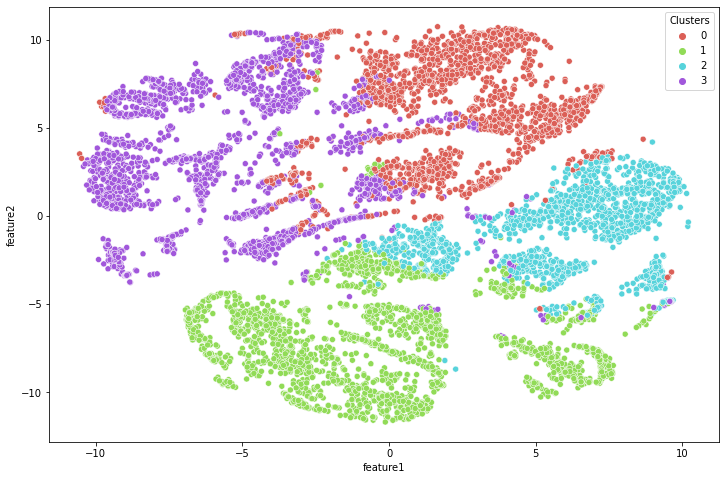

In [115]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## DBSCAN + PCA

In [118]:
clustering_DB_1 = DBSCAN(eps=2.1, min_samples=12).fit(df_pca)
label_DBScan_1 = clustering_DB_1.labels_

In [119]:
pd.DataFrame(label_DBScan_1).value_counts()

 0    7521
 1    1301
-1     128
dtype: int64

when we use PCA with DBSCAN with same epsilon can notice that noise points decrease

## Hierarchical + PCA

In [120]:
clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_pca)
hier_labels = clustering_Agg.labels_
hier_labels


array([3, 2, 0, ..., 3, 2, 1], dtype=int64)

In [121]:

score = silhouette_score(df_pca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.209


In [122]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -6.384003  1.632845         3
1     1.420747 -7.747530         2
2     1.907000  3.119007         0
3    -2.787981 -3.172010         2
4    -0.976071  2.020831         0
...        ...       ...       ...
8945 -8.943099 -3.364820         3
8946 -7.569374 -2.003680         3
8947 -9.235943 -2.342792         3
8948  3.978807 -6.957536         2
8949  6.765435 -5.623805         1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

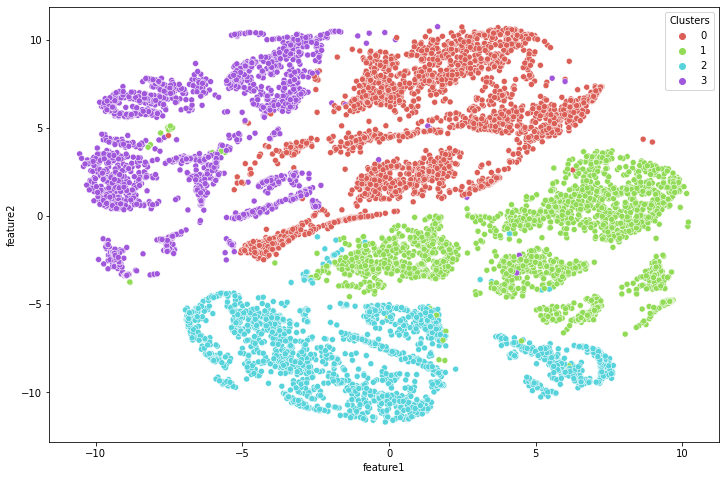

In [123]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

# Anomaly Detection + PCA

## 1. <a>Isolated Random Forest + PCA </a>


In [124]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_pca)

anom_pred = clf.predict(df_pca)
anom_pred

array([1, 1, 1, ..., 1, 1, 1])

In [125]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [126]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1  feature2  Labels
0    -6.384003  1.632845       1
1     1.420747 -7.747530       1
2     1.907000  3.119007       1
3    -2.787981 -3.172010      -1
4    -0.976071  2.020831       1
...        ...       ...     ...
8945 -8.943099 -3.364820      -1
8946 -7.569374 -2.003680       1
8947 -9.235943 -2.342792       1
8948  3.978807 -6.957536       1
8949  6.765435 -5.623805       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

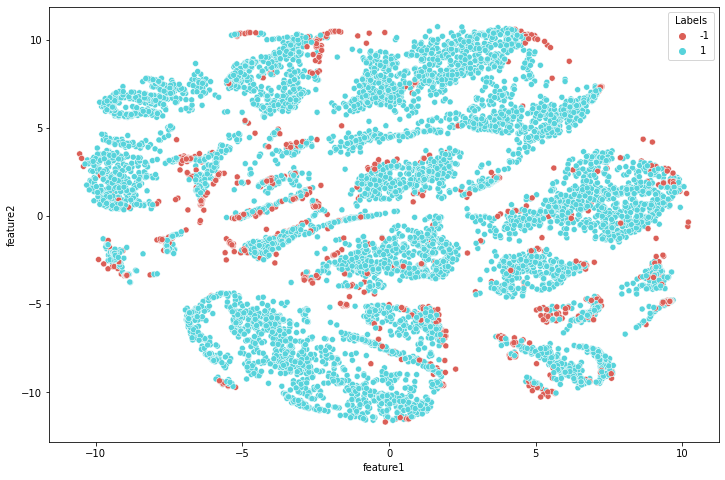

In [127]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + PCA</a>


In [128]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_pca)

In [129]:
scores = gm.score_samples(df_pca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [130]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1  feature2  Labels
0    -6.384003  1.632845       1
1     1.420747 -7.747530       1
2     1.907000  3.119007       1
3    -2.787981 -3.172010      -1
4    -0.976071  2.020831       1
...        ...       ...     ...
8945 -8.943099 -3.364820       1
8946 -7.569374 -2.003680       1
8947 -9.235943 -2.342792       1
8948  3.978807 -6.957536       1
8949  6.765435 -5.623805      -1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

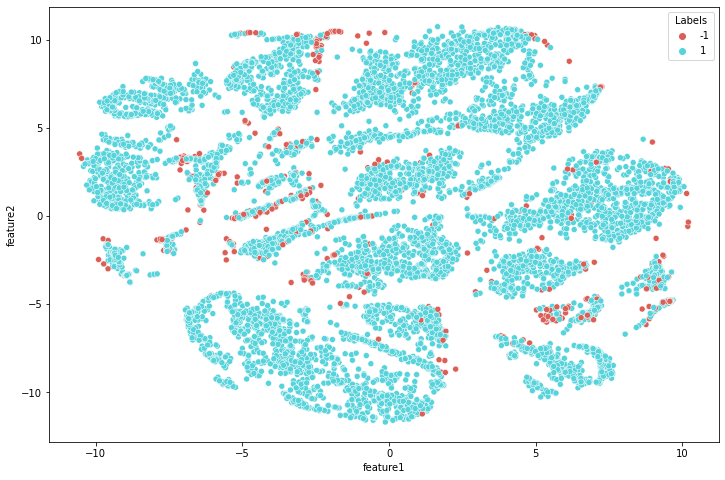

In [131]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN + PCA</a>


In [132]:
DB = DBSCAN(eps=2.2, min_samples=17).fit(df_pca)
label_DBScan = DB.labels_

In [133]:
pd.DataFrame(label_DBScan).value_counts()

 0    7534
 1    1288
-1     128
dtype: int64

Can notice that using DBSAN with same epsilon with PCA not give us noise points , rather than before give us 75 point noise.

##### TSNE

In [134]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(label_DBScan)
df_embed_Iso

feature1  feature2  Labels
0    -6.384003  1.632845       0
1     1.420747 -7.747530       0
2     1.907000  3.119007       0
3    -2.787981 -3.172010       0
4    -0.976071  2.020831       0
...        ...       ...     ...
8945 -8.943099 -3.364820       1
8946 -7.569374 -2.003680       1
8947 -9.235943 -2.342792       1
8948  3.978807 -6.957536       1
8949  6.765435 -5.623805       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

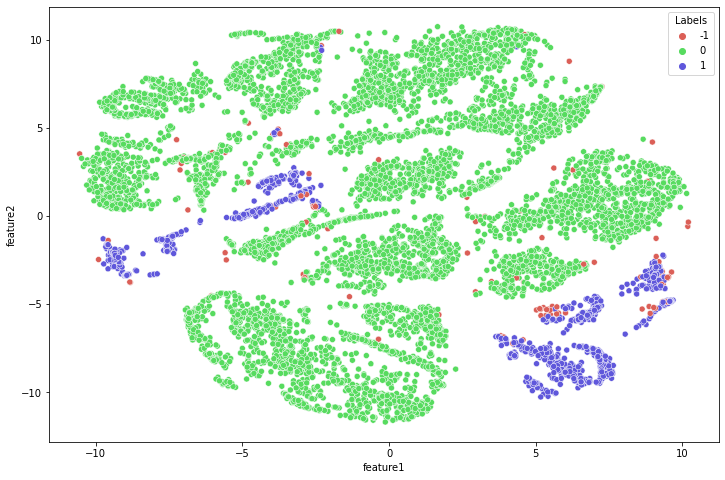

In [135]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 3)
)


# Clustering + KernalPCA

## KMean + KernalPCA

In [136]:
# use sklearn 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_kpca)

labels = kmeans.labels_
iner = kmeans.inertia_
cent = kmeans.cluster_centers_

print("\t~~ THIS RESULT OF K-mean SKLEARN  ~~")
print('~'*50)
print("sum of elements that contain in cluster 0 :",(labels == 0).sum())
print("sum of elements that contain in cluster 1 :",(labels == 1).sum())
print("sum of elements that contain in cluster 2 :",(labels == 2).sum())
print("sum of elements that contain in cluster 3 :",(labels == 3).sum())
#print("sum of elements that contain in cluster 4 :",(labels == 4).sum())

print('-'*50)

#print(iner)
#print(cent)

	~~ THIS RESULT OF K-mean SKLEARN  ~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sum of elements that contain in cluster 0 : 1897
sum of elements that contain in cluster 1 : 2340
sum of elements that contain in cluster 2 : 2940
sum of elements that contain in cluster 3 : 1773
--------------------------------------------------


In [137]:
score = silhouette_score(df_kpca,  labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.295


In [138]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -6.384003  1.632845         2
1     1.420747 -7.747530         1
2     1.907000  3.119007         0
3    -2.787981 -3.172010         2
4    -0.976071  2.020831         2
...        ...       ...       ...
8945 -8.943099 -3.364820         2
8946 -7.569374 -2.003680         2
8947 -9.235943 -2.342792         2
8948  3.978807 -6.957536         2
8949  6.765435 -5.623805         3

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

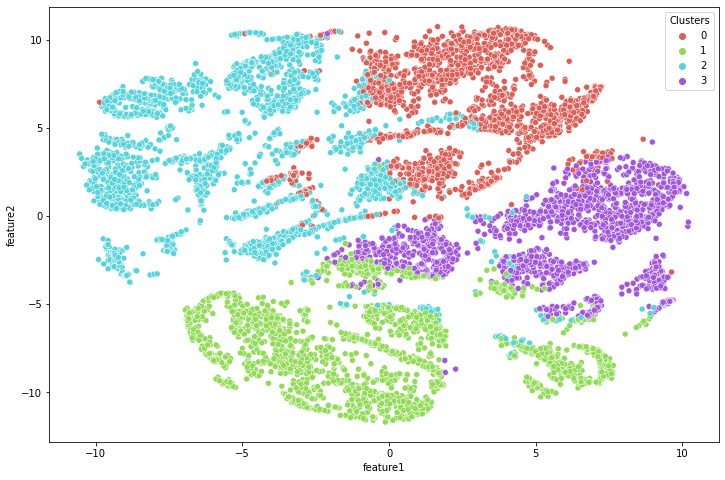

In [139]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## Hierarchical + KernalPCA

In [140]:
clustering_Agg = AgglomerativeClustering(n_clusters=4).fit(df_kpca)
hier_labels = clustering_Agg.labels_
hier_labels


array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [141]:

score = silhouette_score(df_kpca,  hier_labels, metric='euclidean')
print('Silhouett Score: %.3f' % score)

Silhouett Score: 0.263


In [142]:
df_embed_kmeans = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_kmeans['Clusters']= pd.DataFrame(hier_labels)
df_embed_kmeans

feature1  feature2  Clusters
0    -6.384003  1.632845         0
1     1.420747 -7.747530         1
2     1.907000  3.119007         0
3    -2.787981 -3.172010         1
4    -0.976071  2.020831         0
...        ...       ...       ...
8945 -8.943099 -3.364820         0
8946 -7.569374 -2.003680         0
8947 -9.235943 -2.342792         0
8948  3.978807 -6.957536         1
8949  6.765435 -5.623805         1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

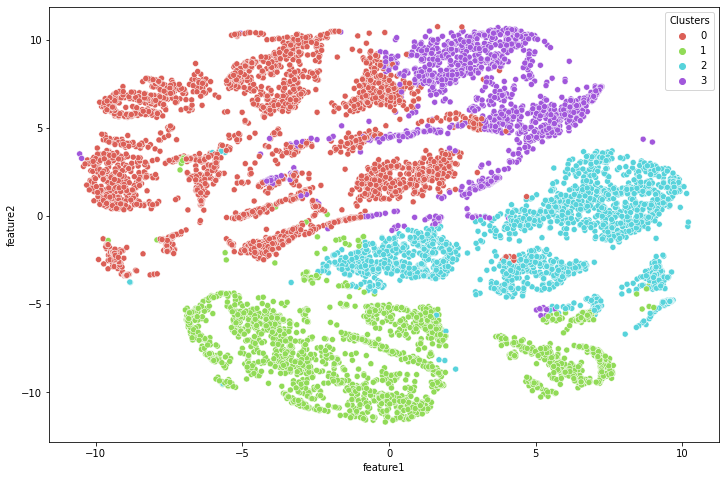

In [143]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', 
    y='feature2',
    data=df_embed_kmeans,    
    hue=df_embed_kmeans['Clusters'],
    palette=sns.color_palette("hls", 4)
)

## DBSCAN + KernalPCA

In [144]:
clustering_DB_1 = DBSCAN(eps=0.4, min_samples=12).fit(df_kpca)
label_DBScan_1 = clustering_DB_1.labels_

In [145]:
pd.DataFrame(label_DBScan_1).value_counts()

0    8950
dtype: int64

Same epsilon not give noise points at this case rather than result without using any dimensionality reduction or using PCA.

# Anomaly Detection + KernalPCA

## 1. <a>Isolated Random Forest + KernalPCA</a>


In [146]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      max_features=2,
                      n_estimators=100,
                      contamination=0.1).fit(df_kpca)

anom_pred = clf.predict(df_kpca)
anom_pred

array([1, 1, 1, ..., 1, 1, 1])

In [147]:
pd.DataFrame(anom_pred).value_counts()

 1    8055
-1     895
dtype: int64

##### TSNE

In [148]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(anom_pred)
df_embed_Iso

feature1  feature2  Labels
0    -6.384003  1.632845       1
1     1.420747 -7.747530       1
2     1.907000  3.119007       1
3    -2.787981 -3.172010       1
4    -0.976071  2.020831       1
...        ...       ...     ...
8945 -8.943099 -3.364820       1
8946 -7.569374 -2.003680       1
8947 -9.235943 -2.342792       1
8948  3.978807 -6.957536       1
8949  6.765435 -5.623805       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

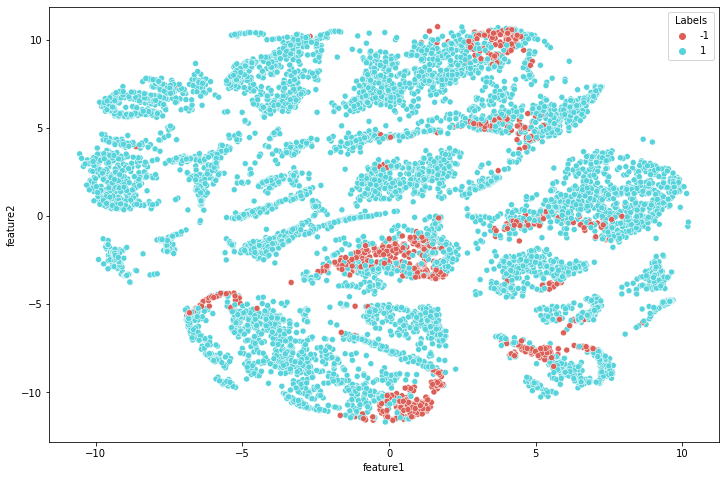

In [149]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 2. <a>EM + KernalPCA</a>


In [150]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_kpca)

In [151]:
scores = gm.score_samples(df_kpca)
thresh = np.quantile(scores, .05)
gm_result=[-1 if val<= thresh else 1 for val in scores]
pd.DataFrame(gm_result).value_counts()

 1    8502
-1     448
dtype: int64

##### TSNE

In [152]:
df_embed_Iso = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed_Iso['Labels']= pd.DataFrame(gm_result)
df_embed_Iso

feature1  feature2  Labels
0    -6.384003  1.632845       1
1     1.420747 -7.747530       1
2     1.907000  3.119007       1
3    -2.787981 -3.172010       1
4    -0.976071  2.020831      -1
...        ...       ...     ...
8945 -8.943099 -3.364820       1
8946 -7.569374 -2.003680       1
8947 -9.235943 -2.342792       1
8948  3.978807 -6.957536       1
8949  6.765435 -5.623805       1

[8950 rows x 3 columns]

<AxesSubplot:xlabel='feature1', ylabel='feature2'>

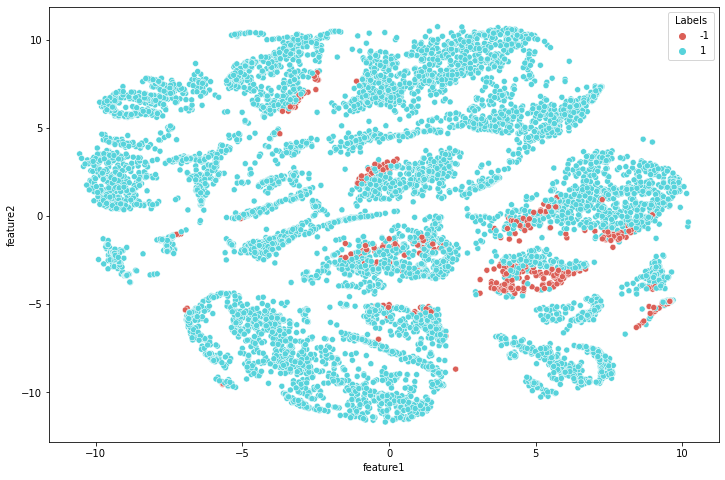

In [153]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed_Iso,    
    hue=df_embed_Iso['Labels'],
    palette=sns.color_palette("hls", 2)
)


## 3. <a>DBSCAN</a>


In [154]:
DB = DBSCAN(eps=0.5, min_samples=17).fit(df_kpca)
label_DBScan = DB.labels_

In [155]:
pd.DataFrame(label_DBScan).value_counts()

0    8950
dtype: int64

using Kernal-PCA at DBSCAN with same parameters not give any noise points 

#### NOTES
- hierarchical Clustering is best algorithm result for clustering here.

- Result (Score) when using dimensionality Reduction (KernalPCA) became better

- I use different approaches to evaluate the perforamance of clustering models :
    <p> • Silhoutte Score </p>
    <p> • Davies Bouldin Score </p>
    <p> • Calinski Harabasz Score </p>
    <p> • TSNE Visualization </p>